In [1]:
# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 3. 분류

## 3.1. MNIST

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [3]:
X , y = mnist['data'],mnist['target']
y = y.astype(np.int)
X.shape
y.shape
X

(70000, 784)

(70000,)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(-0.5, 27.5, 27.5, -0.5)

C:\Users\sorkt\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


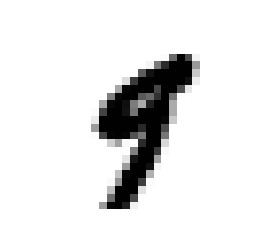

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation = 'nearest')
plt.axis("off")
plt.show()

In [5]:
y[36000]

9

데이터 조사전 테스트셋 분리해야함, MNIST 데이터셋은 이미 훈련셋,테스트셋 분리되어있음

In [6]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

훈련셋을 섞어서 모든 교차검증 폴드가 비슷하게 만듦 (하나의 폴드라도 특정 숫자가 누락되면안됨)  
어떤 알고리듬은 훈련샘플의 순서에 민감하기 때문에 섞어줄 필요있음

In [7]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 3.2. 이진 분류기 훈련  
문제를 단순화 해서 5만 식별하는 분류기 설계하기

분류를 위해 타깃 벡터 만들기

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

SGD 분류기로 학습 (한번에 하나씩 독립적으로 처리하기 떄문에 온라인학습에 잘맞고, 큰 데이터셋을 처리하기 유리함)

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter = 5, random_state=42)
sgd_clf.fit(X_train,y_train_5)

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
sgd_clf.predict([some_digit])

array([False])

## 3.3. 성능 측정

### 3.3.1. 교차 검증을 사용한 정확도 측정

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv = 3,scoring='accuracy')

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

array([0.9605 , 0.95595, 0.95375])

정확도가 매우 높아보이지만 어떤 결과를 넣든 5가 아님을 뱉는 더미 분류기를 만들어 비교하면

In [12]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool)
    
never5clf = Never5Classifier()
cross_val_score(never5clf,X_train,y_train_5,cv = 3, scoring='accuracy')

array([0.909  , 0.90745, 0.9125 ])

데이터 대부분이 5가 아니므로 대충 5가 아니라고만 대답하면 정확도가 높게 나옴  
분류기를 평가할때 정확도를 성능 지표로 선호하지 않는 이유임 (불균형한 데이터셋을 다룰 때 특히 그럼)

### 3.3.2. 오차 행렬  
A의 샘플이 B로 분류된 횟수를 세는것  
예측값을 먼저 만들어야함

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3)
#평가점수가 아닌 각 폴드에서 얻은 예측을 반환함

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[52972,  1607],
       [  989,  4432]], dtype=int64)

행은 실제 클래스, 열은 예측한 클래스  
53533개의 False를 False로 예측
1046개의 False를 True로 잘못예측

In [15]:
confusion_matrix(y_train_5,y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

조금 더 요약된 지표로 정밀도(precision)사용  
TP/(TP+FP)  
위 지표에는 다른 양성 샘플이 들어있지 않기때문에 재현율(recall,sensitivity,true positive rate)  
TP/(TP+FN)  

### 3.3.3. 정밀도와 재현율

In [16]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)
recall_score(y_train_5,y_train_pred)

0.7338963404537175

0.8175613355469471

확실히 정확도로만 볼때보다 안좋아 보임  
정밀도와 재현율을 F1 점수라고 하는 하나의 숫자로 만들면 편리함  
F1은 정밀도와 재현율의 조화평균  
F1 = 2/((1/정밀도)+(1/재현율)) = 2 * (정밀도 * 재현율)/(정밀도 + 재현율)

정밀도 , True로 예측했는데 이중 맞춘게 몇개인가?  
재현율 , 전체 True중에 몇개를 맞췄는가?

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7734729493891798

### 3.3.4. 정밀도/재현율 트레이드오프

사이킷런에서 예측에 사용한 점수를 확인할수 있음

In [18]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-176288.21703149])

In [19]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5, cv =3,
                            method = 'decision_function') #예측 결과가 아닌 점수를 반환

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

In [20]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [21]:
thresholds.shape

(59695,)

In [22]:
precisions.shape

(59696,)

In [23]:
recalls.shape

(59696,)

C:\Users\sorkt\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


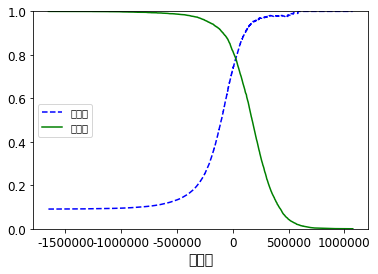

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='정밀도')
    plt.plot(thresholds,recalls[:-1],'g-',label='재현율')
    plt.xlabel('임계값')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

작업 특성에 따라 최선의 정밀도/재현율 트레이드오프를 만족하는 임계값을 선정해야함  
정밀도/재현율 플롯을 그리면 도움이 됨

Text(0.5, 0, 'recall')

Text(0, 0.5, 'precision')

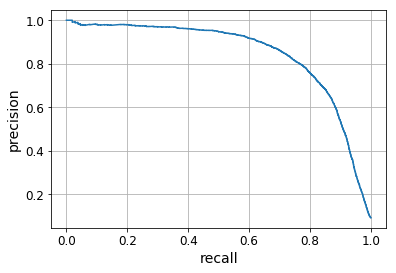

In [25]:
plt.plot(recalls,precisions)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)

정밀도 90%를 달성하는것이 목표일경우

In [26]:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_5,y_train_pred_90)
recall_score(y_train_5,y_train_pred_90)

0.855198572066042

0.7070651171370596

### 3.3.5. ROC 곡선  
수신기 조작 특성 (receiver operation characteristic)  
정밀도/재현율 곡선과 비슷하지만 거짓양성 비율

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

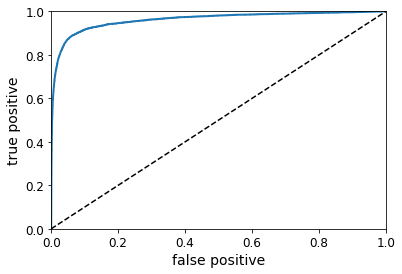

In [28]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('false positive')
    plt.ylabel('true positive')
plot_roc_curve(fpr,tpr)
plt.show()

거짓양성비율은 낮고 진짜양성비율을 낮아야 하므로, 점선으로 부터 멀리 떨어져야 좋은 분류기임  
AUC(area under the curve) 곡선 아래 면적으로 분류기 평가 (완벽한 분류기는 1이고, 랜덤은 0.5임)  

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9614189997126434

랜덤 포레스트를 훈련시켜 점수 비교  
작동방식의 특징때문에 decision_function이 없고 predict_proba()메서드가 있음  
샘플이 행, 클래스가 열이고 샘플이 주어진 클래스에 속할 확률을 반환함 (어떤 이미지가 5일 확률 70%)

In [30]:
from sklearn.ensemble import RandomForestClassifier#(n_estimators=10)
forest_clf = RandomForestClassifier(n_estimators=10,random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train,y_train_5,cv=3,
                                    method="predict_proba")

ROC 곡선을 그리려면 확률이아닌 점수가 필요함,  양성클래스의 확률을 점수로 활용

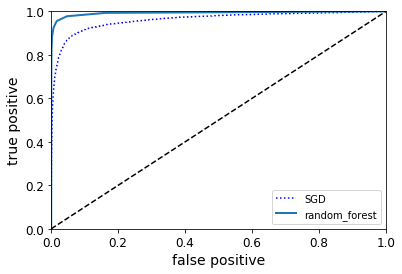

In [31]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,label='random_forest')
plt.legend(loc='lower right')
plt.show()


In [32]:
roc_auc_score(y_train_5,y_scores_forest)

0.9928250745111685

## 3.4. 다중 분류  
랜덤 포레스트나 나이브베이즈는 여러개를 직접 처리할수 있지만 이진분류만 가능한 놈들도 있음  
이런얘들은 이진 분류기를 여러개 사용해서 다중 클래스를 분류 할수도 있음  
예를 들어 숫자 하나만 구분하는 분류기 10개를 훈련시켜 가장 점수가 높은 놈을 선택할수 있음 (일대다 전략, OvA,one-versus-all)  
0과 1 구별, 0과2 구별 등 각 숫자의 조합마다 이진분류기를 훈력시킬수도 있음 (일대일, OvO, one-versus-one) Mnist의 경우 45개의 분류기가 필요함

다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면 사이킷런이 자동으로 감지해 OvA,OvO 선택함  

In [33]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

array([4])

각 클래스의 점수를 확인

In [34]:
some_digit_scores = sgd_clf.decision_function([some_digit])

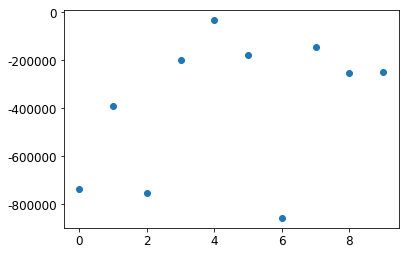

In [35]:
plt.scatter(np.arange(10).reshape(1,10),some_digit_scores)

In [36]:
np.argmax(some_digit_scores)

4

In [37]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
sgd_clf.decision_function([some_digit])

array([[-736165.13534356, -391182.59305387, -752094.90919363,
        -199593.6564959 ,  -33428.88555026, -176288.21703149,
        -856742.40238951, -145757.71304016, -253587.97052021,
        -249064.39096412]])

OneVsOneClassifier나 OneVsRestClassifier를 사용하면 OvO,OvA 강제할수 있음

In [39]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5,random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

array([9])

In [40]:
len(ovo_clf.estimators_)

45

In [41]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

array([9])

In [42]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.9]])

분류기 평가하기

In [43]:
cross_val_score(sgd_clf,X_train,y_train,cv = 3,scoring = 'accuracy')

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

array([0.81908618, 0.86379319, 0.84492674])

입력 스케일만 조정해도 정확도를 높일 수 있음

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv = 3, scoring='accuracy')

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

array([0.91131774, 0.90884544, 0.90883633])

## 3.5. 에러분석

가능성이 있는 모델을 하나 찾았다고 가정하고, 성능을 향상시킬 방법 찾기  
오차행렬로 분석

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

array([[5730,    2,   22,    9,   11,   52,   47,    8,   39,    3],
       [   1, 6459,   54,   29,    6,   43,    6,   11,  123,   10],
       [  53,   34, 5371,   90,   80,   23,   79,   57,  157,   14],
       [  48,   37,  147, 5315,    3,  248,   36,   58,  143,   96],
       [  20,   25,   45,   10, 5338,   10,   49,   36,   87,  222],
       [  72,   40,   38,  170,   72, 4616,  108,   28,  186,   91],
       [  35,   24,   56,    1,   39,   86, 5622,    6,   49,    0],
       [  22,   20,   73,   28,   48,   12,    4, 5832,   18,  208],
       [  53,  146,   84,  152,   14,  147,   55,   27, 5037,  136],
       [  44,   33,   29,   89,  164,   39,    3,  211,   77, 5260]],
      dtype=int64)

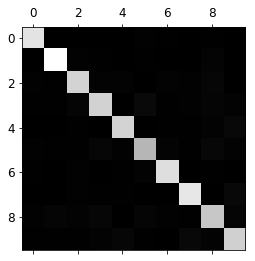

In [46]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv = 3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

5의 경우 조금 어두운데 데이터셋에 5가 적었거나, 분류성능이 떨어지는 경우임  
에러 비율을 비교

In [47]:
row_sum=conf_mx.sum(axis=1,keepdims=True)
row_sum
norm_conf_mx = conf_mx/row_sum

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

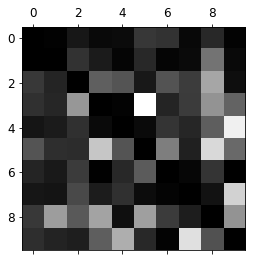

In [48]:
np.fill_diagonal(norm_conf_mx,0) #보기 편하기 주 대각선 0처리
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

행이 실제 클래스, 열이 예측값  
8,9 열이 밝으므로 많은 놈들이 8,9로 잘못 들어간단 말임  
8,9의 행도 밝으므로, 8,9도 오감지가 된다는 소리임

3,5가 서로 오감지되는것을 보완하고, 8,9 감지력을 높일 필요가 있음

In [49]:
np.random.randn(2,2).sum(axis=0,keepdims=True)

array([[-1.09919308, -1.56097226]])

개개의 에러를 분석하면 분류기가 어떤일을 하고 왜 잘못되었는지 통찰을 얻을수 있지만 시간이 오래걸리고 어려움  
3과5의 예시

## 3.6. 다중 레이블 분류  
클래스가 여러개인경우 (나이,이름...)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
knn_clf.predict([some_digit])

array([[ True,  True]])

다중 레이블 분류기를 평가하는 방법은 많지만 프로젝트별로 다름  
각 레이블의 F1점수를 구하고 평균을 사용할 수 도 있음

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3,
                                    n_jobs=-1)
f1_score(y_multilabel,y_train_knn_pred,average='macro')

## 3.7. 다중 출력 분류  
다중출력 다중 클래스 분류(multioutput-multiclass classification)